**Step 1 :**
Data Exploration and Preperation

In [1]:
#EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading
df = pd.read_csv('/content/housing.csv')

# Display the first few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
# as we have a small number of missing values in "total bedrooms" column
# we can impute them with the meant
df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)

/tmp/ipython-input-2377715122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.861822,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266601,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

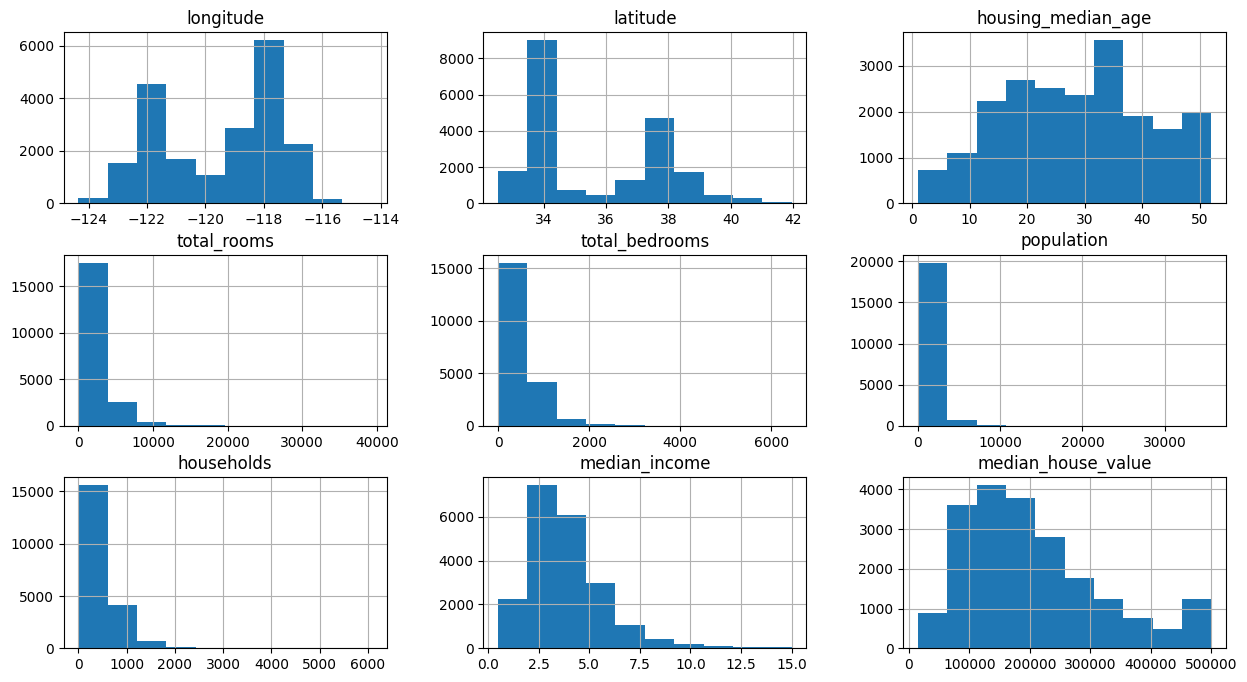

In [9]:
#explore data distribution
df.hist(figsize=(15,8))

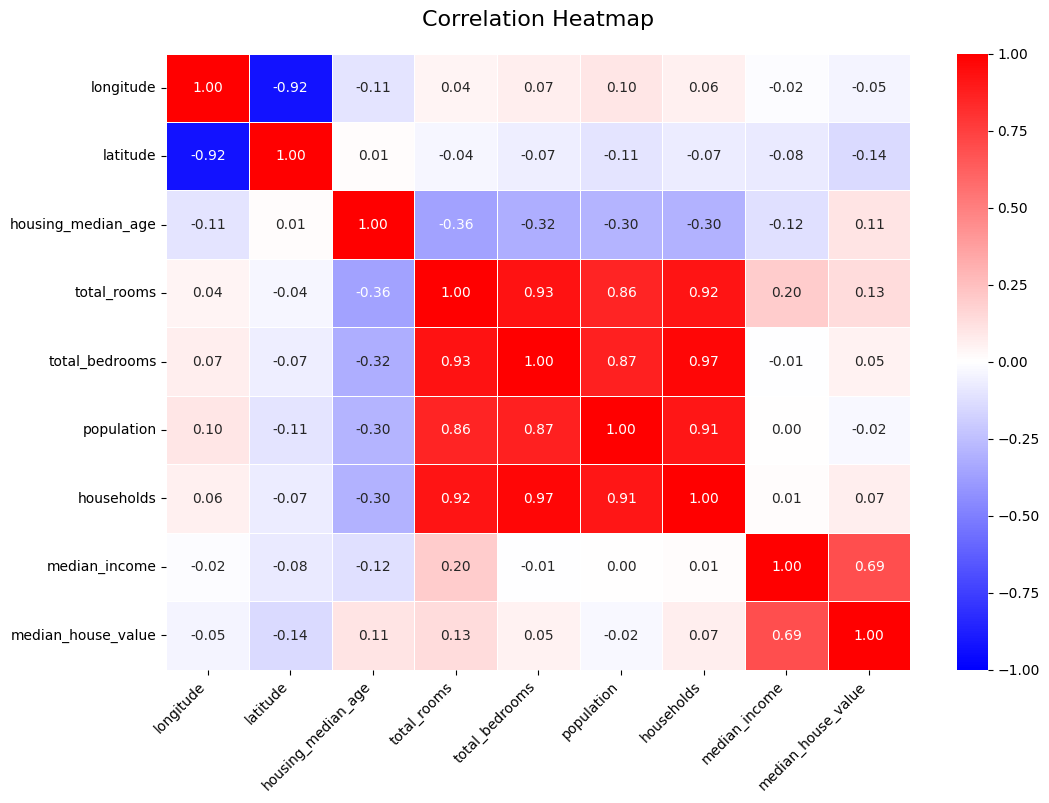

In [28]:
# correlation matrix
corr = df[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap = "bwr",
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink":1}
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

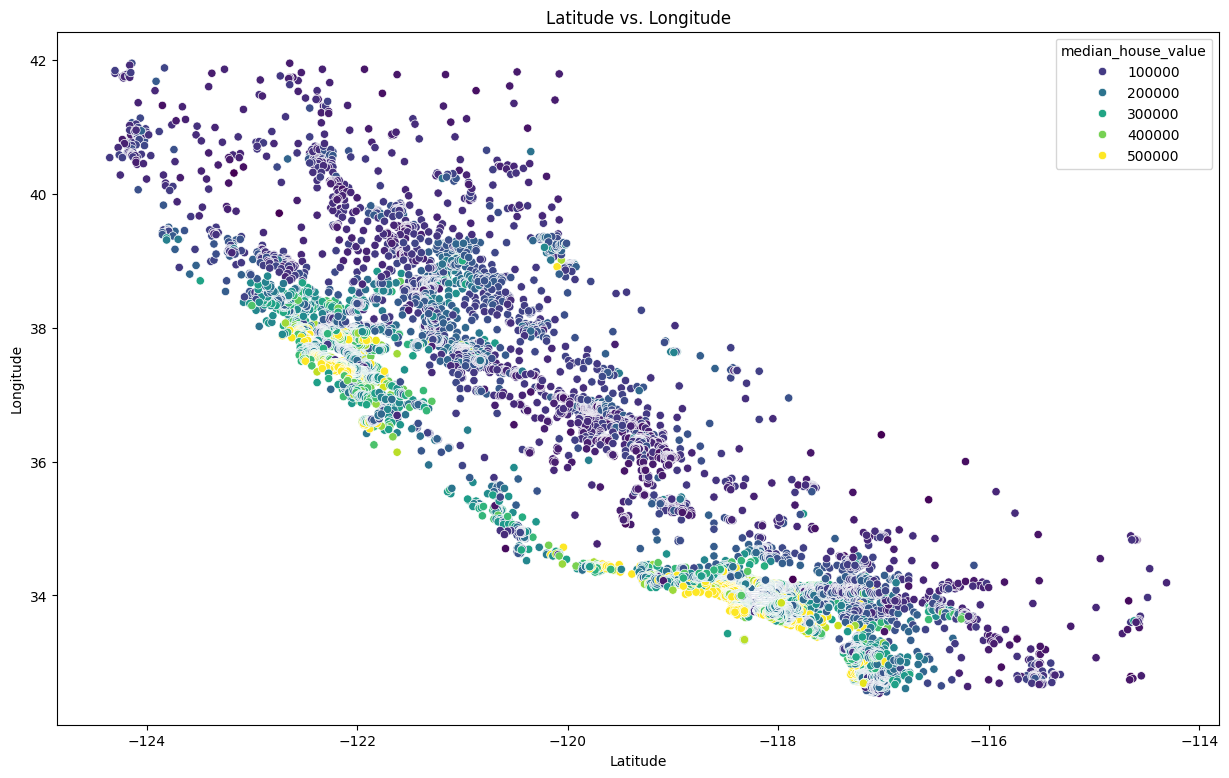

In [17]:
# a useful scatter plot to see values distributions over the position
plt.figure(figsize=(15,9))
sns.scatterplot(data=df,x=df['longitude'],y=df['latitude'],hue=df['median_house_value'],palette='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs. Longitude')
plt.show()


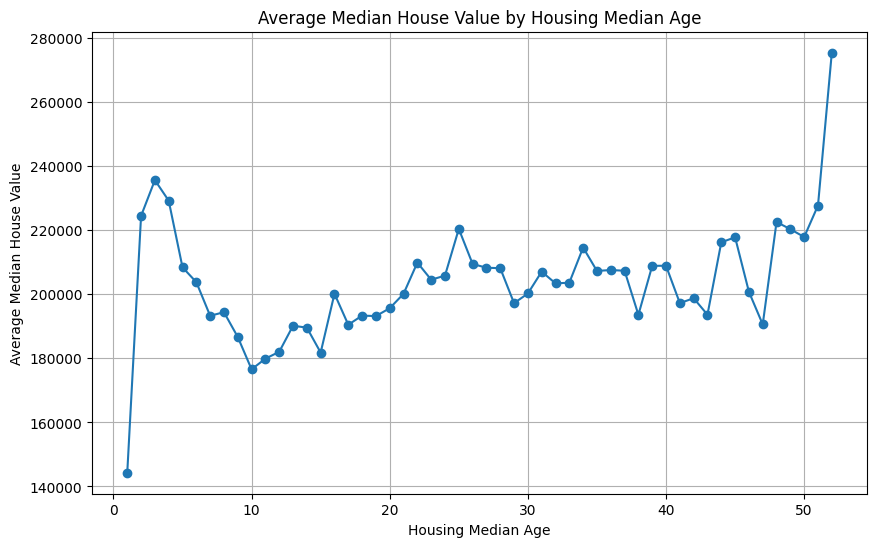

In [18]:
#relation between age and value
avg_house_value_by_age = df.groupby('housing_median_age')['median_house_value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_house_value_by_age.index, avg_house_value_by_age.values, marker='o')
plt.title('Average Median House Value by Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Average Median House Value')
plt.grid(True)
plt.show()

In [22]:
df['ocean_proximity'].value_counts() # one-hot encoding

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [23]:
#one hot encoding for categorical column
df=pd.get_dummies(df,columns=['ocean_proximity'],dtype=int)

**Step 2:** Building Predictive Models

In [25]:
# importing algortithms we will use
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# data spliting and feature selection
x = df.drop(['median_house_value' # target variable
 , 'total_bedrooms' # highly collerated with 'total_rooms'
             ] , axis=1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
#linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.630755388471792
Mean Squared Error: 4838614541.136371


In [32]:
#random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8200886474610767
Mean Squared Error: 2357574516.544689


Notice That Random Forest Regressor has a better results